<a href="https://colab.research.google.com/github/johnreyes96/artificial-vision/blob/master/src/main/python/classes/HighPassAndLowPassFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar numpy para dar soporte a:
# Concatenación de matrices - np.concatenate
import numpy as np

import math

# Importar el módulo cv2 de la librería opencv
import cv2
from google.colab.patches import cv2_imshow

# Soporte para visualización.
import matplotlib.pyplot as plt

# Soporte para funciones de la librería scipy
from scipy import signal
from scipy import misc



(a.) Enlazar Google Drive y cargar imagen en variable.

0
255


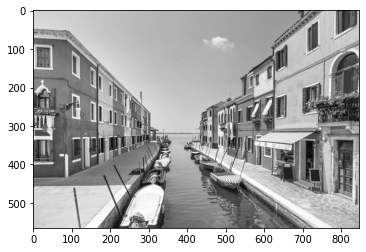

In [ ]:
# Se debe conectar con el Drive, y luego buscar la ruta correcta para leer la imagen
imagenEntrada = cv2.imread('/content/drive/MyDrive/vision_artificial/images/HCColor2.jpg',cv2.IMREAD_GRAYSCALE) # Considerar la 4, 4a, 5 
# imagenEntrada = cv2.cvtColor(imagenEntrada, cv2.COLOR_BGR2RGB) # OpenCV usa el ordenamiento BGR por defecto, mientras que matplotlib asume RGB.

plotInputIm = plt.imshow(imagenEntrada, cmap="gray", vmin=0, vmax=255)

print(np.min(imagenEntrada))
print(np.max(imagenEntrada))

In [ ]:
# Se procede a convolucionar la imagen con un filtro pasa-altos o uno pasa-bajos.
# Para el filtrado pasa-altos considere un filtro de Sobel: https://en.wikipedia.org/wiki/Sobel_operator

# A continuación, se requiere impolementar una función que haga un filtrado pasa-altos o pasa-bajos, según sea la prefencia del usuario.
# Como argumentos de entrada debe recibir la imagen bajo inspección, y un enfoque: una cadena de caracteres indicando si el filtrado es
# pasa-bajos o pasa-altos.

# Caso 1: Aplicar filtrado pasa altos, usando operadores de prewitt.
Hx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
Hy = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Hx = np.array([[2, 1, 0, -1, -2], [2, 1, 0, -1, -2], [2, 1, 0, -1, -2], [2, 1, 0, -1, -2], [2, 1, 0, -1, -2]])
# Hy = np.array([[2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [-1, -1, -1, -1, -1], [-2, -2, -2, -2, -2]])

Hx = np.array([[3, 2, 1, 0, -1, -2, -3], [3, 2, 1, 0, -1, -2, -3], [3, 2, 1, 0, -1, -2, -3], [3, 2, 1, 0, -1, -2, -3], [3, 2, 1, 0, -1, -2, -3], [3, 2, 1, 0, -1, -2, -3], [3, 2, 1, 0, -1, -2, -3]])
Hy = np.array([[3, 3, 3, 3, 3, 3, 3], [2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0], [-1, -1, -1, -1, -1, -1, -1], [-2, -2, -2, -2, -2, -2, -2], [-3, -3, -3, -3, -3, -3, -3]])

# Calcular las componentes de gfradiente
# Para calcular la convolición: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

Gx = signal.convolve2d(imagenEntrada, Hx, 'same', 'symm')
Gy = signal.convolve2d(imagenEntrada, Hy, 'same', 'symm')

# Calcular magnitud del gradiente
MG = np.array((Gx**2) + (Gy**2))

# Estructura np.array: variable = np.array([[C_11, C_12, C_13], [C_21, C_22, C_23], [C_31, C_32, C_33]])


Visualización de las imágenes de entrada y salida.

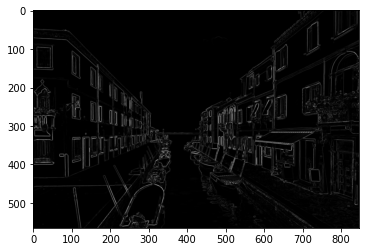

In [ ]:
# plt.rcParams["figure.figsize"] = [20,20]
# f, axarr = plt.subplots(1,2) # https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib
# axarr[0].imshow(imagenEntrada, cmap="gray", vmin=0, vmax=255)
# axarr[1].imshow(convolved, cmap="gray", vmin=0, vmax=255)
plotOutputIm = plt.imshow(MG, cmap="gray") #, vmin=0, vmax=255)

In [ ]:
plotOutputIm = plt.imshow(MG, cmap="gray")

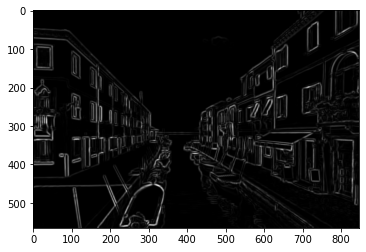

In [ ]:
plotOutputIm = plt.imshow(MG, cmap="gray")

ROI: Segmento. la imagen bajo inspeccion


Kernel, operador, mascara o filtro

tamaño(ROI) = tamaño(Kernel) => impar; el kernel suele ser cuadrado. # filas = # columnas
-----------

Kernel*ROI => se lee: "convolucion"

Isotropico
Anisotropico
Correlacion

Coursera-> Andrew Ng

F[I] F[k]

F^-1 I*K

----------------
Filtrado pasa-altos -> Tipicamente necesita 2 kernels, sirve para detectar discontinudades, los bordes son discontinudades
Filtrado pasa-bajos -> Se requiere solo un kernel, para atenuar ruido en la imagen


--------------
Salt & Pepper